In [49]:
#importing the basic libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [50]:
#reading my csv file and storing it as dataframe into the 'df' using pandas.
df = pd.read_csv(r"C:\Users\USER\Downloads\archive (1)\energy_efficiency_data.csv")
df.head()

,Relative_Compactness,Surface_Area,Wall_Area,Roof_Area,Overall_Height,Orientation,Glazing_Area,Glazing_Area_Distribution,Heating_Load,Cooling_Load
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


In [51]:
#checking the datashape. it has 768 different house datas stored along with 10 columns.
df.shape

(768, 10)

In [52]:
#checking for the nulls. the data has no nulls values so we can skip the dropna() function
df.isna().sum()

Relative_Compactness         0
Surface_Area                 0
Wall_Area                    0
Roof_Area                    0
Overall_Height               0
Orientation                  0
Glazing_Area                 0
Glazing_Area_Distribution    0
Heating_Load                 0
Cooling_Load                 0
dtype: int64

In [53]:
#checking for duplicates with duplicated() function
df.duplicated().sum()

0

In [54]:
#The dataset summary reveals key insights into the building features and their energy needs. 
#Notably, the mean values for heating and cooling loads are 22.31 and 24.59 respectively, 
#indicating a moderate energy requirement. The minimum and maximum values for these loads 
#suggest a wide range of building efficiencies within the dataset.
df.describe()

,Relative_Compactness,Surface_Area,Wall_Area,Roof_Area,Overall_Height,Orientation,Glazing_Area,Glazing_Area_Distribution,Heating_Load,Cooling_Load
count,768.000000,768.000000,768.000000,768.000000,768.00000,768.000000,768.000000,768.00000,768.000000,768.000000
mean,0.764167,671.708333,318.500000,176.604167,5.25000,3.500000,0.234375,2.81250,22.307201,24.587760
std,0.105777,88.086116,43.626481,45.165950,1.75114,1.118763,0.133221,1.55096,10.090196,9.513306
min,0.620000,514.500000,245.000000,110.250000,3.50000,2.000000,0.000000,0.00000,6.010000,10.900000
25%,0.682500,606.375000,294.000000,140.875000,3.50000,2.750000,0.100000,1.75000,12.992500,15.620000
50%,0.750000,673.750000,318.500000,183.750000,5.25000,3.500000,0.250000,3.00000,18.950000,22.080000
75%,0.830000,741.125000,343.000000,220.500000,7.00000,4.250000,0.400000,4.00000,31.667500,33.132500
max,0.980000,808.500000,416.500000,220.500000,7.00000,5.000000,0.400000,5.00000,43.100000,48.030000


In [55]:
#printing all the columns
df.columns

Index(['Relative_Compactness', 'Surface_Area', 'Wall_Area', 'Roof_Area',
       'Overall_Height', 'Orientation', 'Glazing_Area',
       'Glazing_Area_Distribution', 'Heating_Load', 'Cooling_Load'],
      dtype='object')

In [56]:
#is fully populated with non-null values, ensuring a robust dataset for analysis. 
#It features a mix of float and integer data types, 
#encompassing various building characteristics and energy load parameters
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Relative_Compactness       768 non-null    float64
 1   Surface_Area               768 non-null    float64
 2   Wall_Area                  768 non-null    float64
 3   Roof_Area                  768 non-null    float64
 4   Overall_Height             768 non-null    float64
 5   Orientation                768 non-null    int64  
 6   Glazing_Area               768 non-null    float64
 7   Glazing_Area_Distribution  768 non-null    int64  
 8   Heating_Load               768 non-null    float64
 9   Cooling_Load               768 non-null    float64
dtypes: float64(8), int64(2)
memory usage: 60.1 KB


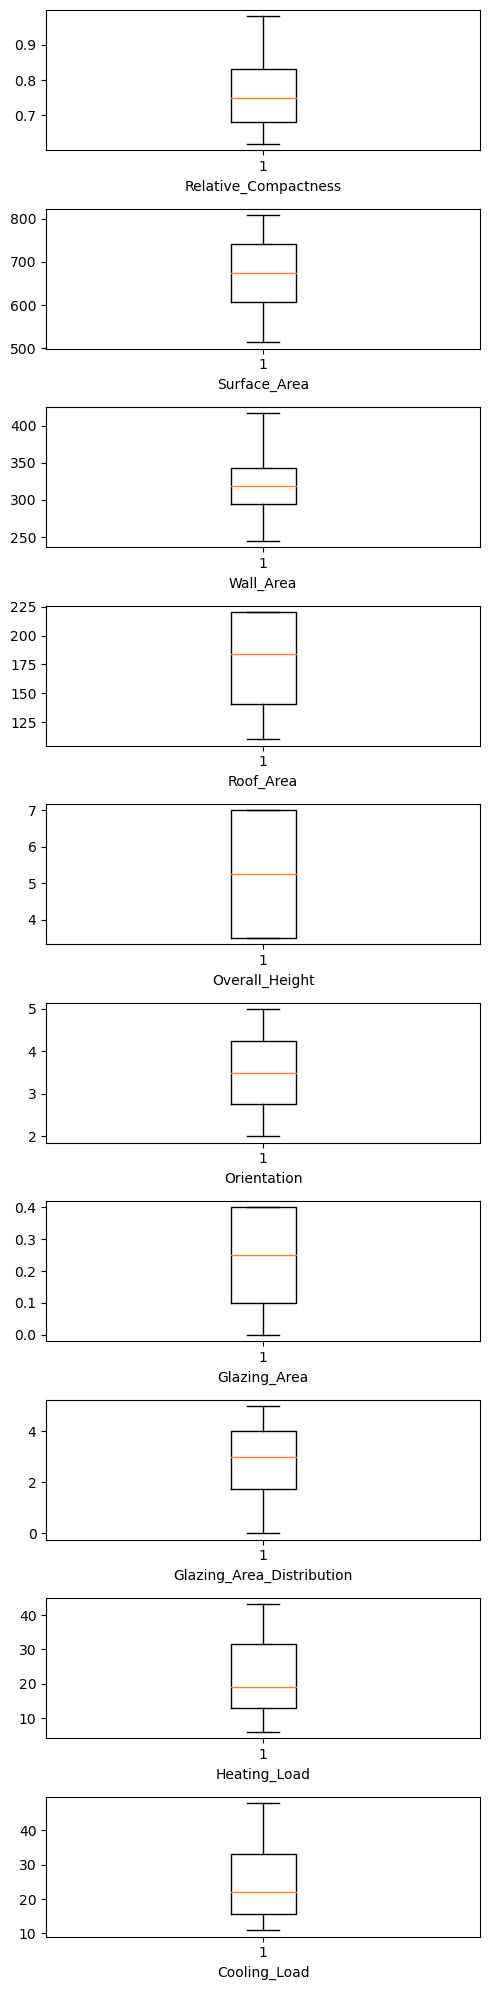

In [57]:
#outliers visualization using boxplot
plt.figure(figsize=(5,20))
for i, col in enumerate(df.columns):
    plt.subplot(len(df.columns), 1, i + 1)
    plt.boxplot(df[col])
    plt.xlabel(col)

plt.tight_layout()
plt.show()

<Axes: >

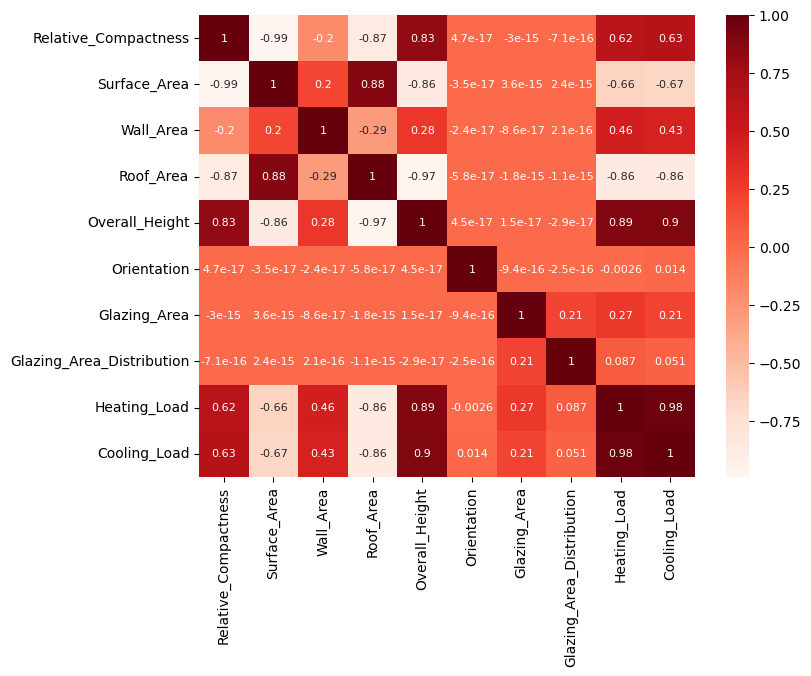

In [58]:
#Both Heating_Load and Cooling_Load show strong correlations with 
#Relative_Compactness, Surface_Area, Roof_Area, and Overall_Height. 
#This suggests these features are important predictors for the energy efficiency of the buildings.
cor = df.corr()
plt.figure(figsize=(8,6))
sns.heatmap(cor,annot = True,cmap='Reds',annot_kws={"size": 8})

In [59]:
#splitting the dependent and independent features into X and Y variable
X = df.drop(['Heating_Load','Cooling_Load'], axis = 1)
Y = df[["Heating_Load","Cooling_Load"]]

In [60]:
X.head()

,Relative_Compactness,Surface_Area,Wall_Area,Roof_Area,Overall_Height,Orientation,Glazing_Area,Glazing_Area_Distribution
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0


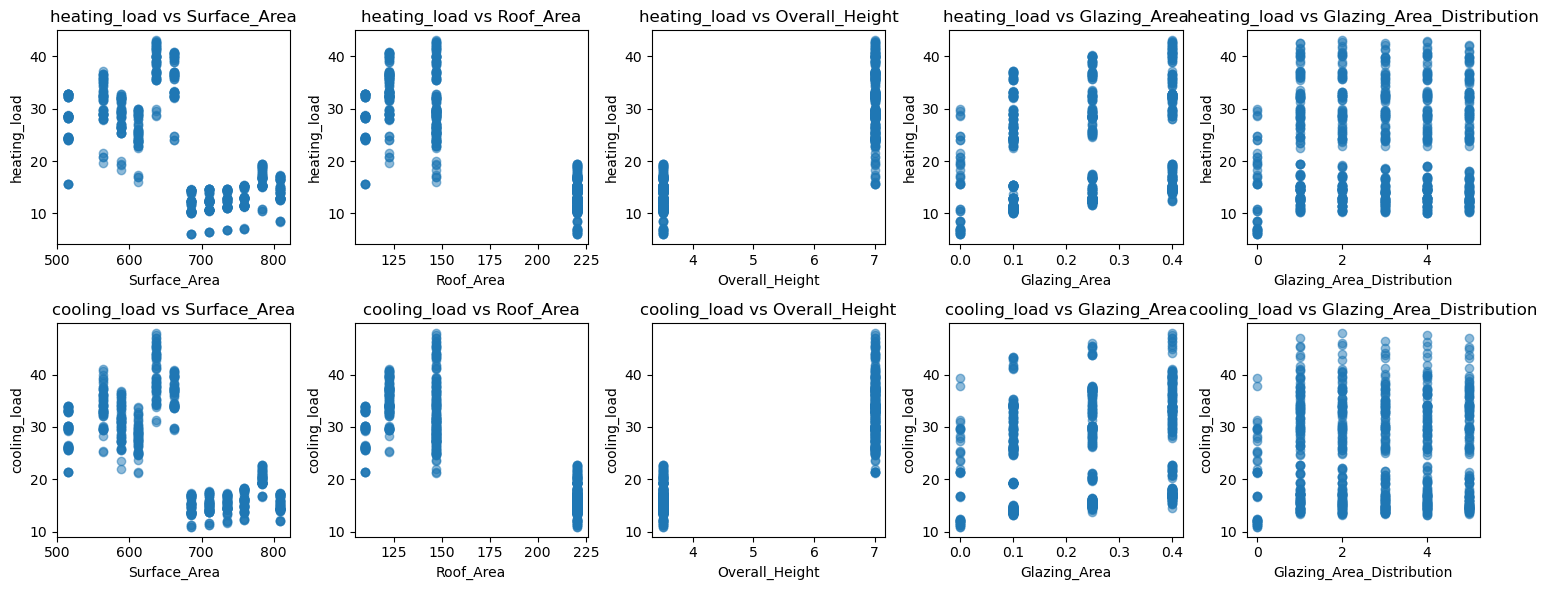

In [96]:
#This code generates a series of scatter plots to visually examine the relationships between
#each feature in the dataset and the two target variables, Heating_Load and Cooling_Load.
#It aims to provide insights into how each feature individually correlates with the target variables,
#aiding in understanding their potential influence.

plt.figure(figsize=(15, 6))
for i, feature in enumerate(X.columns):
    plt.subplot(2, 5, i + 1)
    plt.scatter(X[feature], Y['Heating_Load'], alpha=0.5)
    plt.xlabel(feature)
    plt.ylabel('heating_load')
    plt.title(f'heating_load vs {feature}')

# Create scatter plots for cooling_load
for i, feature in enumerate(X.columns):
    plt.subplot(2, 5, i + 6)
    plt.scatter(X[feature], Y['Cooling_Load'], alpha=0.5)
    plt.xlabel(feature)
    plt.ylabel('cooling_load')
    plt.title(f'cooling_load vs {feature}')

plt.tight_layout()
plt.show()

In [62]:
#This code snippet calculates the Variance Inflation Factor (VIF) for each feature in the dataset,
#assessing the degree of multicollinearity among the predictors. The results help in identifying 
#features that might need attention due to high multicollinearity.

from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data = pd.DataFrame()
vif_data["X"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif_data)

                           X         VIF
0       Relative_Compactness  168.948751
1               Surface_Area         inf
2                  Wall_Area         inf
3                  Roof_Area         inf
4             Overall_Height  134.035782
5                Orientation   10.796725
6               Glazing_Area    4.293656
7  Glazing_Area_Distribution    4.496320


C:\Users\USER\anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


In [63]:
#This line of code removes the 'Wall_Area' feature from the DataFrame X,
#due to its high multicollinearity with other features as identified by the VIF analysis.
X = X.drop(['Wall_Area'], axis=1)

In [64]:
#again repeating the VIF identification process for the remaining features
vif_data = pd.DataFrame()
vif_data["X"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif_data)

                           X         VIF
0       Relative_Compactness  168.948751
1               Surface_Area  324.009108
2                  Roof_Area  289.445911
3             Overall_Height  134.035782
4                Orientation   10.796725
5               Glazing_Area    4.293656
6  Glazing_Area_Distribution    4.496320


In [65]:
#removing Relative_Compactness and Orientation
X = X.drop(["Relative_Compactness",'Orientation'], axis = 1)

In [66]:
vif_data = pd.DataFrame()
vif_data["X"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif_data)

#Considering the multicollinearity issue, particularly with Surface_Area and Roof_Area, 
#we'll keep these features as they are, without any additional feature engineering, 
#given their importance in the context of energy efficiency.

                           X         VIF
0               Surface_Area  240.467724
1                  Roof_Area  150.855951
2             Overall_Height   19.114091
3               Glazing_Area    4.285088
4  Glazing_Area_Distribution    4.486469


In [67]:
#splitting the data for training and testing using train_test_split.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [68]:
#importig the Ridge class from the sklearn.linear_model module of the Scikit-learn library,
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score

In [69]:
# we will be using Ridge regression here as it will address multi colinearity and reduce over fitting.
#alpha=1.0: is setting the strength of the regularization.
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)

Ridge()

In [70]:
#creating predicted y variable.
y_pred = ridge_model.predict(X_test)

In [71]:
#calculating the RMSE and R² for the Heating_Load predictions
rmse_heating = np.sqrt(mean_squared_error(y_test['Heating_Load'], y_pred[:, 0]))
r2_heating = r2_score(y_test['Heating_Load'], y_pred[:, 0])

In [72]:
##calculating the RMSE and R² for the Cooling_Load predictions
rmse_cooling = np.sqrt(mean_squared_error(y_test['Cooling_Load'], y_pred[:, 1]))
r2_cooling = r2_score(y_test['Cooling_Load'], y_pred[:, 1])

In [73]:
#The Ridge Regression model exhibits strong predictive performance with an R-squared of 0.907 
#for Heating_Load and 0.887 for Cooling_Load, explaining a high proportion of variance in both targets. 
#The Root Mean Squared Errors (RMSE) of 3.117 for Heating_Load and 3.235 for Cooling_Load indicate 
#moderate average deviations from the actual values, reflecting the model's overall accuracy and effectiveness.
rmse_heating, r2_heating, rmse_cooling, r2_cooling

(3.1168615285312304, 0.906795727293395, 3.2345195549274197, 0.8870879695305699)

In [100]:
coefficients = pd.DataFrame(ridge_model.coef_, columns=X.columns, index=['Heating_Load', 'Cooling_Load']).T

In [101]:
#Overall_Height and Glazing_Area show a significant positive impact, while Roof_Area has a negative effect, 
#and Surface_Area and Glazing_Area_Distribution demonstrate a relatively smaller influence on both target variables.
coefficients

,Heating_Load,Cooling_Load
Surface_Area,0.052305,0.042287
Roof_Area,-0.079897,-0.047867
Overall_Height,5.369615,5.473445
Glazing_Area,18.529575,13.676515
Glazing_Area_Distribution,0.247377,0.062971


<Figure size 1200x600 with 0 Axes>

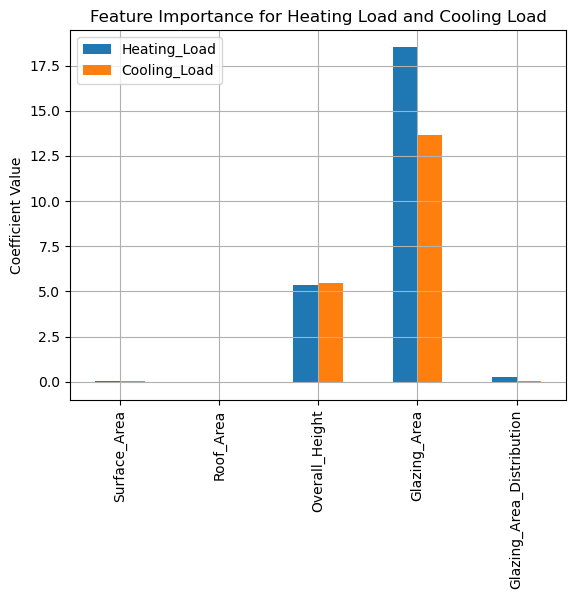

In [75]:
plt.figure(figsize=(12, 6))
coefficients.plot(kind='bar')
plt.title('Feature Importance for Heating Load and Cooling Load')
plt.ylabel('Coefficient Value')
plt.grid(True)
plt.show()

In [77]:
#generating a set of predicted values (y_pred_train) for Heating_Load and Cooling_Load.
y_pred_train = ridge_model.predict(X_train)

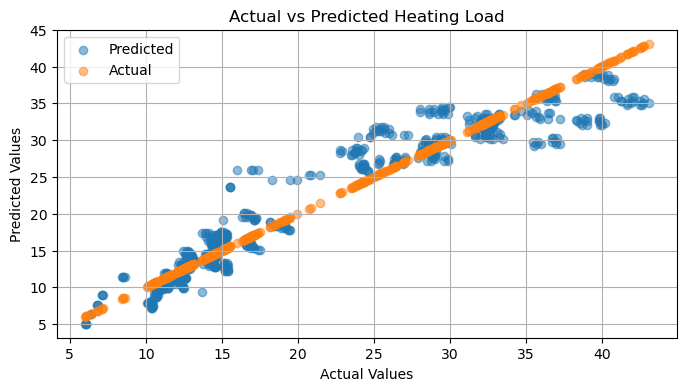

In [79]:
#comparison between actual and predicted Heating_Load values with a scatter plot, 
#and includes a reference line representing perfect predictions, 
#aiding in the assessment of the model's predictive accuracy.
plt.figure(figsize=(8, 4))
plt.scatter(y_train['Heating_Load'], y_pred_train[:, 0], alpha=0.5, label='Predicted')
plt.scatter(y_train['Heating_Load'], y_train['Heating_Load'], alpha=0.5, label='Actual')
plt.title('Actual vs Predicted Heating Load')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.grid(True)
plt.show()

#The scatter plot shows a strong alignment between actual and predicted heating load values, 
#indicating the model's fairly high accuracy in forecasting energy performance.

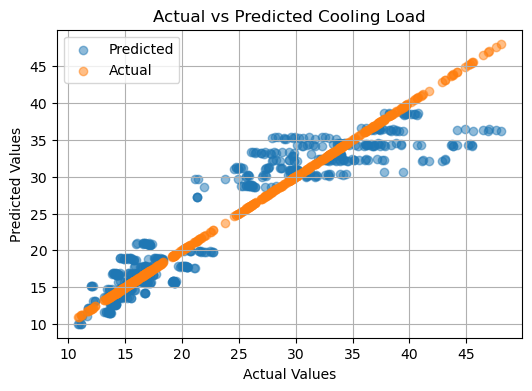

In [81]:
#comparison between actual and predicted cooling_Load values with a scatter plot
plt.figure(figsize=(6, 4))
plt.scatter(y_train['Cooling_Load'], y_pred_train[:, 1], alpha=0.5, label='Predicted')
plt.scatter(y_train['Cooling_Load'], y_train['Cooling_Load'], alpha=0.5, label='Actual')
plt.title('Actual vs Predicted Cooling Load')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.grid(True)
plt.show()

In [82]:
#calculating the residuals
residuals_heating = y_train['Heating_Load'] - y_pred_train[:, 0]
residuals_cooling = y_train['Cooling_Load'] - y_pred_train[:, 1]

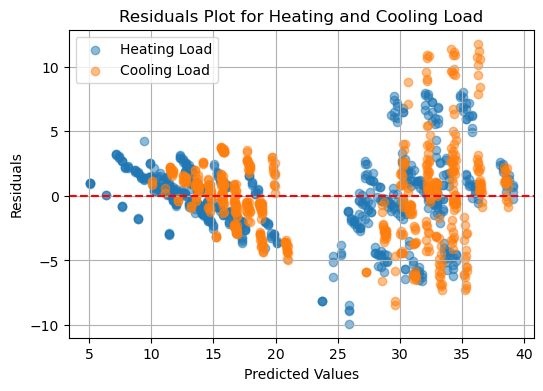

In [84]:
#Both heating and cooling loads show a spread of residuals across the range of predicted values. 
#There doesn't appear to be a systematic pattern in the residuals for either, 
#which suggests the model's errors are not biased in a particular direction
plt.figure(figsize=(6, 4))
plt.scatter(y_pred_train[:, 0], residuals_heating, alpha=0.5, label='Heating Load')
plt.scatter(y_pred_train[:, 1], residuals_cooling, alpha=0.5, label='Cooling Load')
plt.title('Residuals Plot for Heating and Cooling Load')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.axhline(y=0, color='r', linestyle='--')
plt.legend()
plt.grid(True)
plt.show()

In [87]:
#importing pickle to save the model for further uses.
import pickle

In [89]:
with open ('BuildingEnergyModel.pkl','wb') as file:
    pickle.dump(ridge_model,file)

In [90]:
with open('BuildingEnergyModel.pkl', 'rb') as file:
    loaded_model = pickle.load(file)